In [18]:
import pandas as pd
import numpy as np
from gp_data import GP_DATA
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
"""
EDA with GCSCAT Data
"""

allData = GP_DATA()
df_GCSCAT = allData.GCSCAT()
df_GCSCAT.head()
#df_GCSCAT.describe()
df_GCSCAT.columns

Index(['No.', 'Object Name', 'RA-s', 'Dec-s', 'RA', 'Dec', 'Redshift (z)',
       'cz', 'z flag', 'Phys Type', 'EM Region', 'Reference', 'Note',
       'Photometry', 'Position', 'Redshift', 'Diameter', 'Distances',
       'Classification', 'Images', 'Spectra'],
      dtype='object')

In [3]:
#num_clust = df_GCSCAT["Num_Glob_Clust"]
#r_eff = df_GCSCAT["Effective_Radius"]

In [5]:
"""
EDA with correct GCS Data (I think)
"""

df_GCS = allData.GCS()
#df_GCS.head()
df_GCS.columns

Index(['Galaxy', 'Other_ID', 'RA_hr', 'DEC_deg', 'Type', 'D_Mpc', 'D_Mpc+-',
       'Method', 'A_V', 'M_V^T', 'M_V^T+-', 'M_K', 'M_K+-', 'N(GC)', 'N(GC)+-',
       'Source', 'sig_e_km/s', 'sig_e_km/s+-', 'R_e_kpc', 'R_e_kpc+-',
       'lg_M_d_M_sun', 'lg_M_d_M_sun+-', 'lg_M_G_M_sun', 'lg_M_G_M_sun+-',
       'lg_M_B_M_sun', 'lg_M_B_M_sun+', 'lg_M_B_M_sun-'],
      dtype='object')

Text(0.5, 1.0, 'Number of Globular Clusters against Velocity Dispersion')

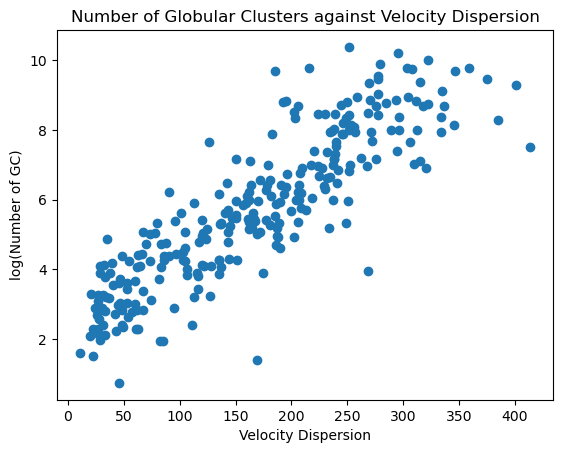

In [32]:
Reff = pd.to_numeric(df_GCS['R_e_kpc'], errors='coerce')
velDisp = pd.to_numeric(df_GCS['sig_e_km/s'], errors='coerce')
velDispLog = np.log(velDisp)
NumGC = pd.to_numeric(df_GCS['N(GC)'], errors='coerce')
#model = LinearRegression().fit(Reff, NumGC)
#linregX = np.linspace(0,60, 100)
#linregY = model.predict(linregX)

#plt.scatter(Reff, NumGC)
#plt.scatter(velDisp, NumGC)
plt.scatter(velDisp, np.log(NumGC))
plt.xlabel("Velocity Dispersion")
plt.ylabel("log(Number of GC)")
plt.title("Number of Globular Clusters against Velocity Dispersion")

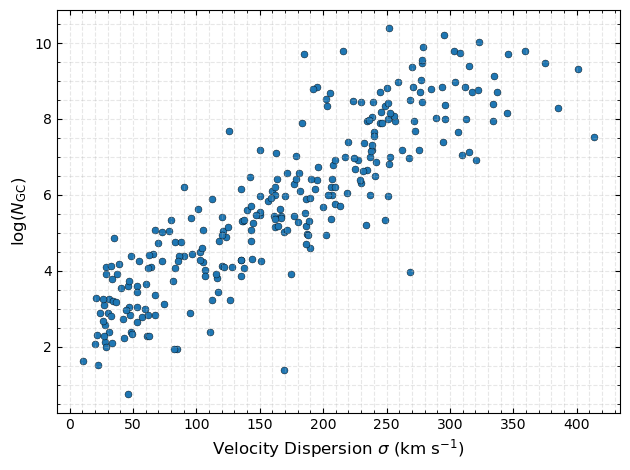

In [34]:
plt.scatter(velDisp, np.log(NumGC), s=25, edgecolor='black', linewidth=0.3)

plt.xlabel(r"Velocity Dispersion $\sigma$ (km s$^{-1}$)", fontsize=12)
plt.ylabel(r"$\log(N_{\rm GC})$", fontsize=12)
#plt.title("Number of Globular Clusters against Velocity Dispersion")

plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.minorticks_on()
plt.tick_params(axis="both", which="both", direction="in", top=True, right=True)
plt.tight_layout()
plt.show()